In [1]:
import pandas as pd

In [2]:
customers_df = pd.read_csv("../data/raw/csv/customers.csv")
transactions_df = pd.read_csv("../data/raw/csv/transactions.csv")

## Understanding the Dataset

Personal analysis on the bottom of the notebook

In [3]:
customers_df.head()

,customer_id,country,signup_date,email
0,1,DK,2022-01-22,user0@example.com
1,2,FI,2021-12-22,user1@example.com
2,3,SE,2023-08-18,user2@example.com
3,4,DK,2022-01-25,user3@example.com
4,5,DK,2019-09-26,user4@example.com


In [4]:
customers_df.columns

Index(['customer_id', 'country', 'signup_date', 'email'], dtype='object')

In [5]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  5000 non-null   int64 
 1   country      5000 non-null   object
 2   signup_date  5000 non-null   object
 3   email        5000 non-null   object
dtypes: int64(1), object(3)
memory usage: 156.4+ KB


In [6]:
customers_df.isnull().sum()

customer_id    0
country        0
signup_date    0
email          0
dtype: int64

In [38]:
customers_df['email'].duplicated().sum()

np.int64(0)

In [7]:
customers_df.duplicated().sum()

np.int64(0)

In [8]:
print(customers_df[customers_df['customer_id']==1971])

      customer_id country signup_date                 email
1970         1971      SE  2021-07-28  user1970@example.com


In [9]:
transactions_df.head()

,transaction_id,customer_id,amount,currency,timestamp,category
0,0,1971.0,126.58,SEK,2020-04-29 06:17:00,NaN
1,1,3823.0,43.79,NOK,2020-03-28 15:14:00,food
2,2,2820.0,53.29,eur,2020-03-08 22:40:00,electronics
3,3,903.0,132.21,EUR,2020-11-23 01:02:00,unknown
4,4,365.0,75.50,SEK,2020-02-09 04:54:00,unknown


In [10]:
transactions_df.columns

Index(['transaction_id', 'customer_id', 'amount', 'currency', 'timestamp',
       'category'],
      dtype='object')

In [11]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122000 entries, 0 to 121999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   transaction_id  122000 non-null  int64  
 1   customer_id     121970 non-null  float64
 2   amount          122000 non-null  float64
 3   currency        97356 non-null   object 
 4   timestamp       122000 non-null  object 
 5   category        101780 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 5.6+ MB


In [12]:
print(transactions_df.describe())

       transaction_id    customer_id         amount
count    122000.00000  121970.000000  122000.000000
mean      59994.12109    2503.117586     100.083971
std       34652.75182    1444.491884      40.001002
min           0.00000       1.000000     -58.830000
25%       29982.75000    1253.000000      73.130000
50%       59983.50000    2511.000000     100.020000
75%       90007.00000    3753.000000     126.910000
max      119999.00000    5000.000000     263.110000


In [13]:
print(
    transactions_df[transactions_df["customer_id"] == 1971.0].sort_values(
        by="timestamp", ascending=True
    )
)

        transaction_id  customer_id  amount currency            timestamp  \
105291          105291       1971.0   97.26      NaN  2020-02-11 13:24:00   
17513            17513       1971.0   47.07      NOK  2020-02-19 02:35:00   
62067            62067       1971.0   83.57      NOK  2020-02-20 15:15:00   
47145            47145       1971.0   72.49      eur  2020-02-22 10:24:00   
85552            85552       1971.0  113.11      EUR  2020-04-02 02:47:00   
98143            98143       1971.0  126.31      NaN  2020-04-03 01:33:00   
0                    0       1971.0  126.58      SEK  2020-04-29 06:17:00   
86033            86033       1971.0   86.76      eur  2020-05-10 23:17:00   
67173            67173       1971.0   77.03      SEK  2020-07-01 09:25:00   
67964            67964       1971.0   74.79      SEK  2020-09-10 13:09:00   
15705            15705       1971.0  119.12      EUR  2020-09-24 07:32:00   
24935            24935       1971.0   96.67      SEK  2020-10-30 02:06:00   

In [14]:
print(transactions_df[transactions_df['category']=='unknown'].head(5))

    transaction_id  customer_id  amount currency            timestamp category
3                3        903.0  132.21      EUR  2020-11-23 01:02:00  unknown
4                4        365.0   75.50      SEK  2020-02-09 04:54:00  unknown
5                5       4259.0  171.98      EUR  2020-10-29 10:17:00  unknown
6                6       3120.0   44.99      EUR  2020-03-02 21:36:00  unknown
19              19       1138.0   99.54      NaN  2020-01-14 21:24:00  unknown


In [15]:
transactions_df[transactions_df["currency"].isnull()].head()

,transaction_id,customer_id,amount,currency,timestamp,category
9,9,116.0,86.18,NaN,2020-08-07 11:47:00,food
13,13,4936.0,83.51,NaN,2020-12-10 20:44:00,Electronics
17,17,2335.0,60.96,NaN,2020-10-05 03:54:00,NaN
19,19,1138.0,99.54,NaN,2020-01-14 21:24:00,unknown
29,29,277.0,113.63,NaN,2020-07-07 19:08:00,NaN


In [16]:
unique_currency = transactions_df['currency'].unique()
print(unique_currency)

['SEK' 'NOK' 'eur' 'EUR' nan]


In [17]:
transactions_df.duplicated().sum()

np.int64(2000)

In [18]:
transactions_df["customer_id"].isnull().sum()

np.int64(30)

In [19]:
transactions_df['transaction_id'].duplicated().sum()

np.int64(2000)

In [20]:
df = transactions_df.copy()

df = df.dropna(subset=['customer_id'])

In [21]:
print(df['customer_id'].isna().sum())

0


In [22]:
customers_df['customer_id'] = customers_df['customer_id'].astype(int)
df['customer_id'] = df['customer_id'].astype(int)

invalid_transactions_count = df[~df['customer_id'].isin(customers_df['customer_id'])].shape[0]

print(f"Number of transactions with non-existing customer_id: {invalid_transactions_count}")

Number of transactions with non-existing customer_id: 0


In [23]:
tx_freq = (
    transactions_df
    .groupby("customer_id")
    .size()
    .reset_index(name="transaction_count")
    .sort_values("transaction_count", ascending=False)
)


threshold = tx_freq["transaction_count"].quantile(0.95)

high_freq_customers = tx_freq[
    tx_freq["transaction_count"] >= threshold
]

high_freq_customers

,customer_id,transaction_count
3032,3033.0,48
4482,4483.0,47
2665,2666.0,41
4309,4310.0,41
256,257.0,41
...,...,...
2704,2705.0,33
4766,4767.0,33
2063,2064.0,33
3873,3874.0,33


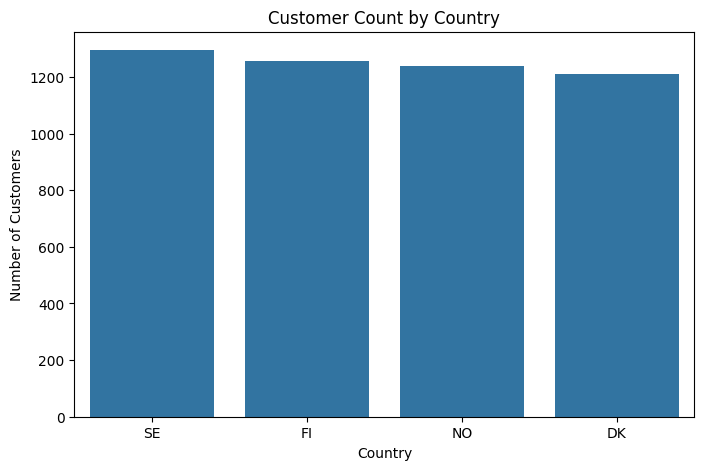

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Country distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    data=customers_df, x="country", order=customers_df["country"].value_counts().index
)
plt.title("Customer Count by Country")
plt.xlabel("Country")
plt.ylabel("Number of Customers")
plt.show()

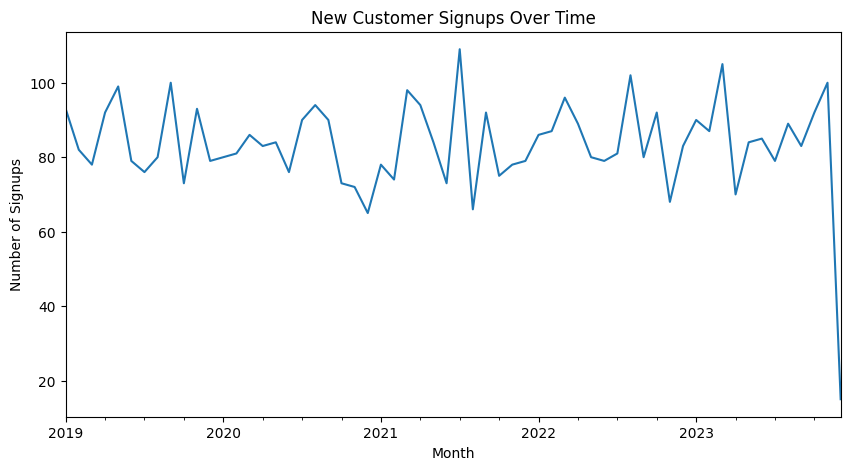

In [25]:
# Signup trend over time
customers_df["signup_date"] = pd.to_datetime(customers_df["signup_date"])
signup_per_month = customers_df.groupby(
    customers_df["signup_date"].dt.to_period("M")
).size()

signup_per_month.plot(kind="line", figsize=(10, 5))
plt.title("New Customer Signups Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Signups")
plt.show()

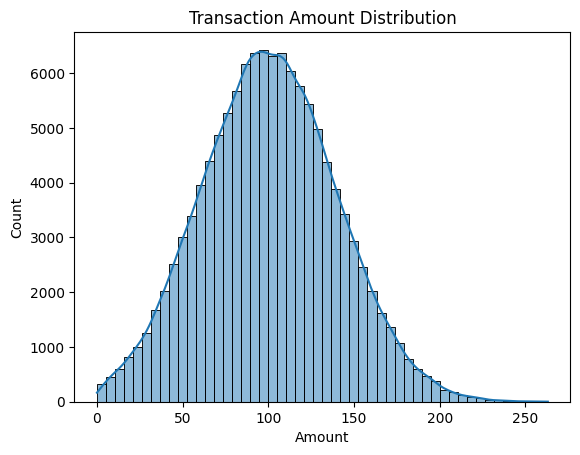

In [26]:
# Remove obvious negative amounts for plotting
sns.histplot(
    transactions_df[transactions_df["amount"] >= 0]["amount"], bins=50, kde=True
)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Count")
plt.show()

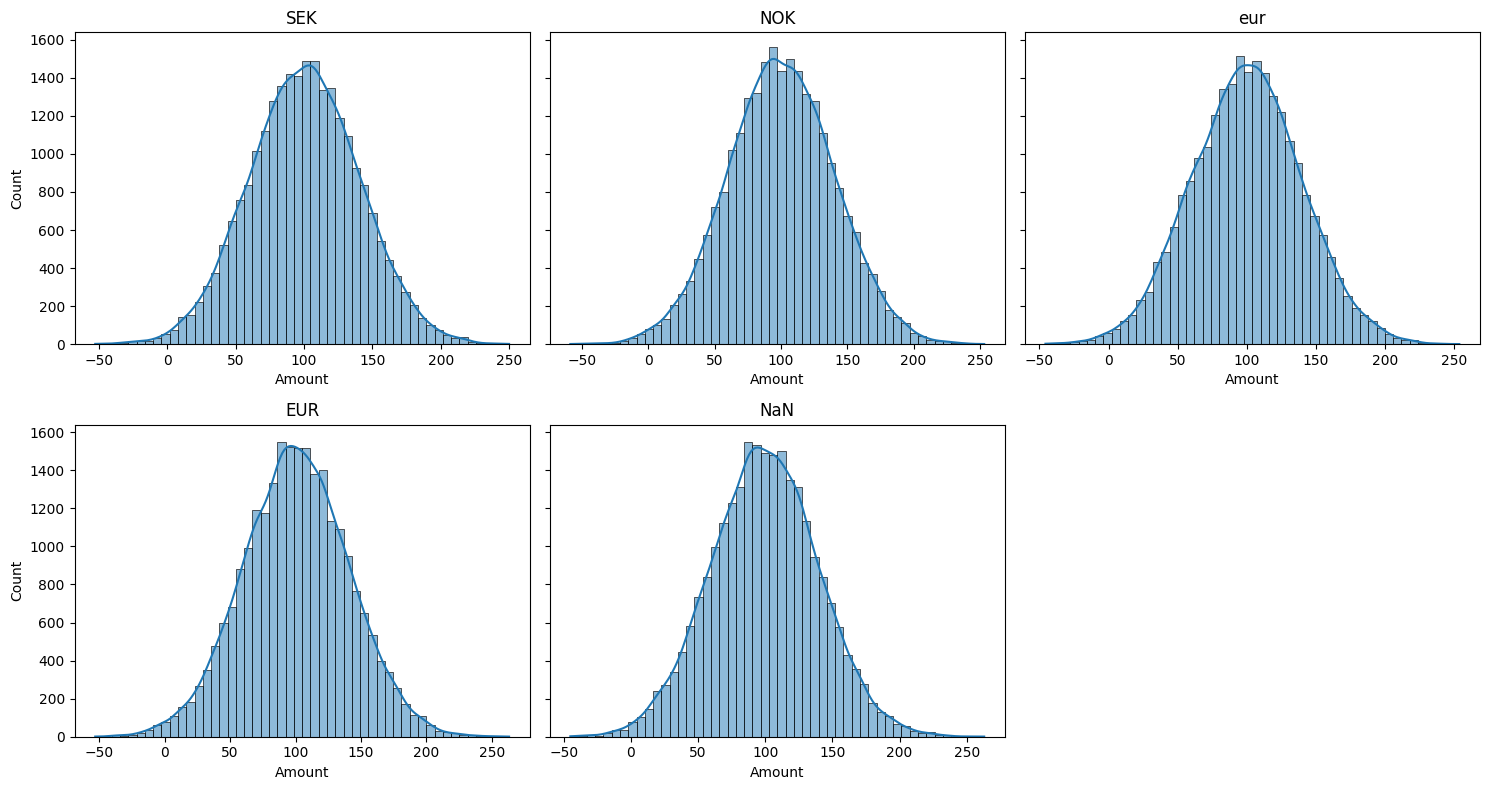

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd

currencies = transactions_df["currency"].unique()

n = len(currencies)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(
    rows,
    cols,
    figsize=(5 * cols, 4 * rows),
    sharey=True
)

axes = axes.flatten()

for ax, curr in zip(axes, currencies):

    if pd.isna(curr):
        data = transactions_df.loc[
            transactions_df["currency"].isna(), "amount"
        ]
        title = "NaN"
    else:
        data = transactions_df.loc[
            transactions_df["currency"] == curr, "amount"
        ]
        title = curr

    sns.histplot(
        data,
        bins=50,
        kde=True,
        ax=ax
    )

    ax.set_title(title)
    ax.set_xlabel("Amount")
    ax.set_ylabel("Count")

# Remove empty plots
for ax in axes[len(currencies):]:
    ax.remove()

plt.tight_layout()
plt.show()

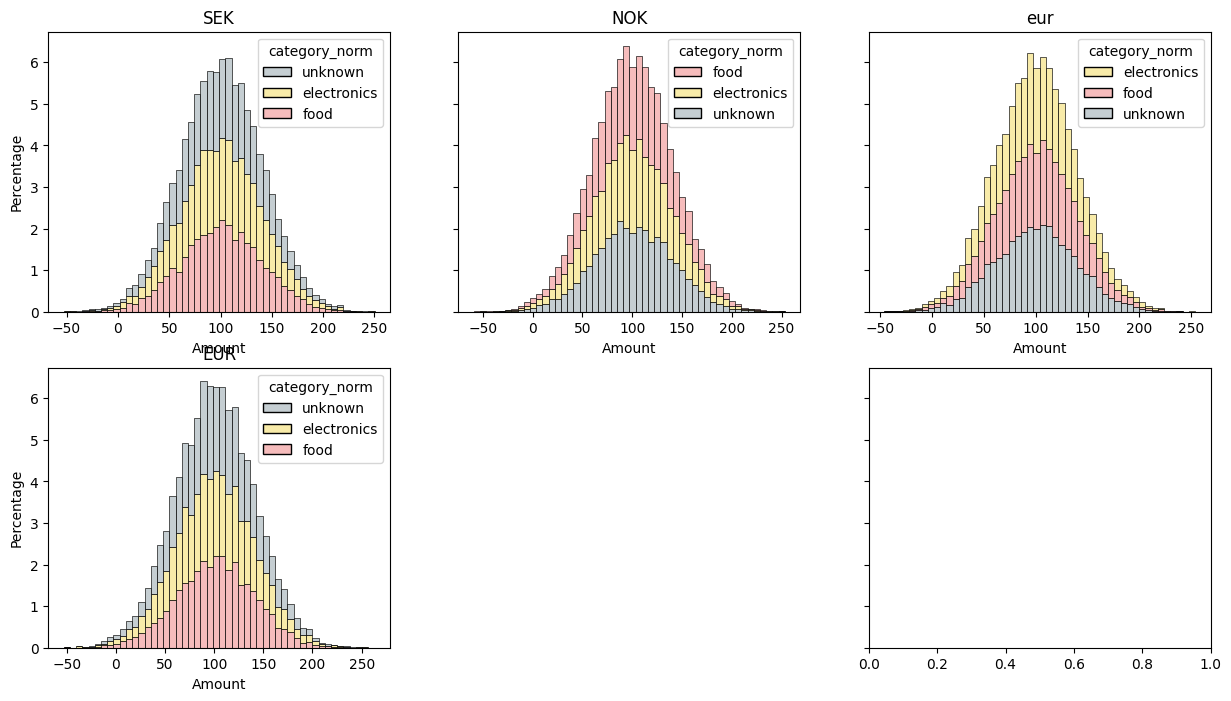

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

n = len(currencies)
cols = 3
rows = math.ceil(n / cols)

fig, axes = plt.subplots(
    rows,
    cols,
    figsize=(5 * cols, 4 * rows),
    sharey=True
)

axes = axes.flatten()

palette = {
    "food": "#f4a6a6",         # pastel red
    "electronics": "#f6e58d",  # pastel yellow
    "unknown": "#b2bec3"       # gray
}

for ax, curr in zip(axes, currencies):
    subset = transactions_df[
        transactions_df["currency"] == curr
    ].copy()

    if subset.empty:
        ax.set_visible(False)
        continue

    subset["category_norm"] = (
        subset["category"]
        .str.lower()
        .where(
            subset["category"].str.lower().isin(
                ["food", "electronics"]
            ),
            "unknown"
        )
    )

    sns.histplot(
        data=subset,
        x="amount",
        hue="category_norm",
        bins=50,
        multiple="stack",
        stat="percent",
        palette=palette,
        ax=ax
    )

    ax.set_title(curr)
    ax.set_xlabel("Amount")
    ax.set_ylabel("Percentage")

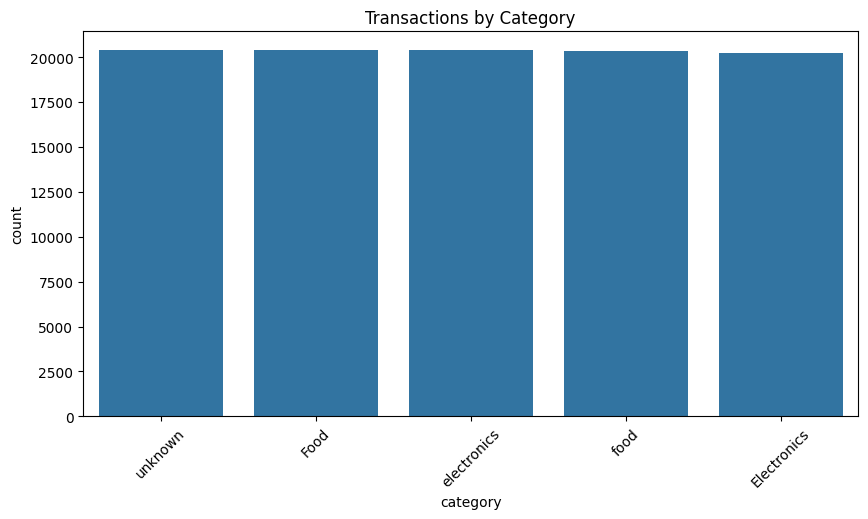

In [36]:
# Transactions per category
plt.figure(figsize=(10, 5))
sns.countplot(
    data=transactions_df,
    x="category",
    order=transactions_df["category"].value_counts().index,
)
plt.title("Transactions by Category")
plt.xticks(rotation=45)
plt.show()

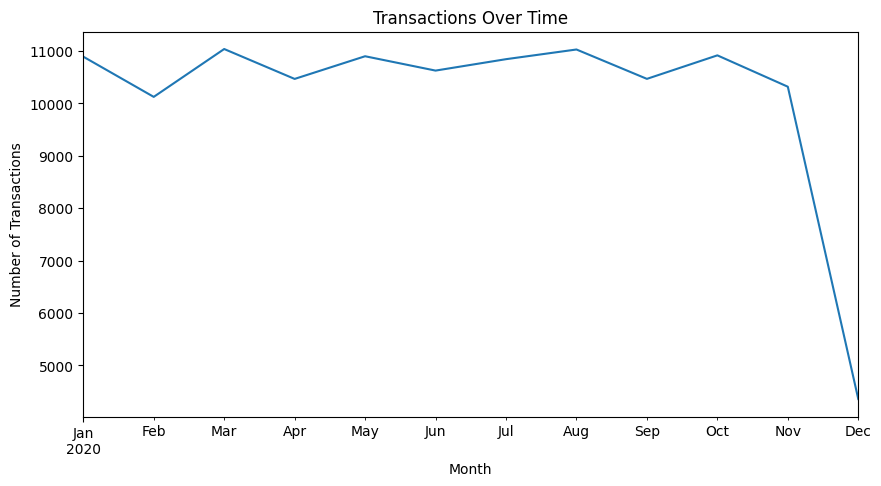

In [33]:
# Transactions over time
transactions_df["timestamp"] = pd.to_datetime(transactions_df["timestamp"])
transactions_per_month = transactions_df.groupby(
    transactions_df["timestamp"].dt.to_period("M")
).size()
transactions_per_month.plot(kind="line", figsize=(10, 5))
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.show()

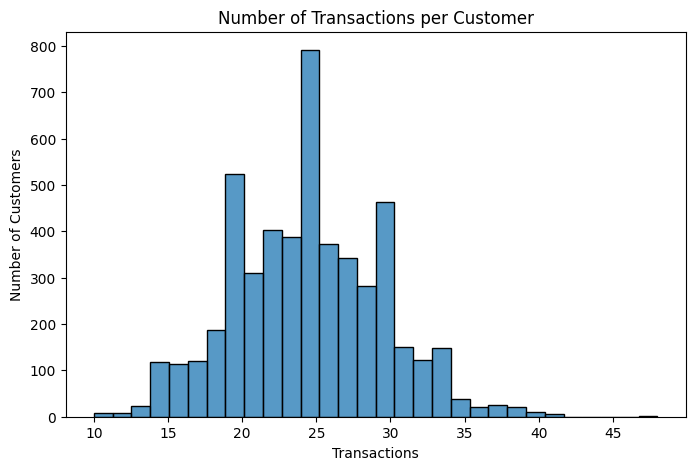

In [34]:
# Transactions per customer
transactions_per_customer = transactions_df.groupby("customer_id").size()
plt.figure(figsize=(8, 5))
sns.histplot(transactions_per_customer, bins=30)
plt.title("Number of Transactions per Customer")
plt.xlabel("Transactions")
plt.ylabel("Number of Customers")
plt.show()

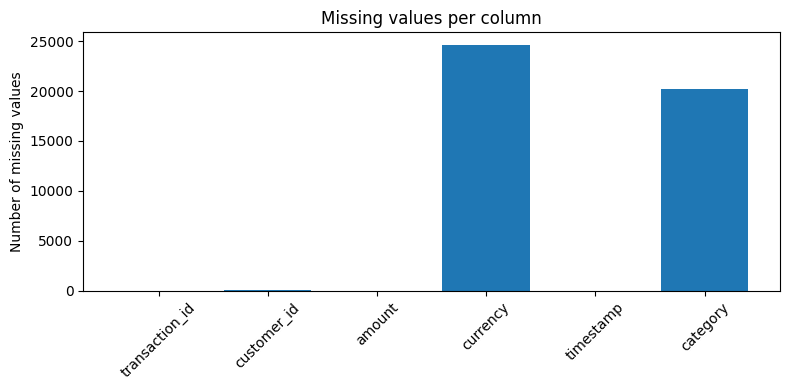

In [35]:
# plotting missing values of transactions. (customers_df is clean)
missing_counts = transactions_df.isnull().sum()

plt.figure(figsize=(8, 4))
plt.bar(missing_counts.index, missing_counts.values)
plt.ylabel("Number of missing values")
plt.title("Missing values per column")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
def missing_summary(df):
    total = df.isna().sum()
    percent = (total / len(df)) * 100
    return pd.DataFrame({'missing_count': total, 'missing_percent': percent}).sort_values('missing_percent', ascending=False)

missing_summary(customers_df)
missing_summary(transactions_df)

,missing_count,missing_percent
currency,24644,20.20000
category,20220,16.57377
customer_id,30,0.02459
transaction_id,0,0.00000
amount,0,0.00000
timestamp,0,0.00000


In [20]:
# Whether they are missing together or indepened
pd.crosstab(
    transactions_df['currency'].isna(),
    transactions_df['category'].isna(),
    rownames=['currency missing'],
    colnames=['category missing']currency_missing = transactions_df['currency'].isna()
category_missing = transactions_df['category'].isna()

# P(category missing | currency missing)
(category_missing[currency_missing].mean())

)


category missing,False,True
currency missing,,
False,81221,16135
True,20559,4085


customers_df is structured, but lets include in pipeline a type check to ensure that correct data and data type is forwarded (for fufture implementation as well)

Transactions_df is a bit unstructed and needs to be transformed. 
- customer_id: rows with missing values -> should be removed. (As we cannot ensure which customer is related to the transaction, we must discard it)
- amount: seems to be a column with no missing values. Can be used as a good reference, but include a test in etl pipeline
- currency has: eur and EUR, values should be normalized to uppercase. Also lot of missing values which could be predicted based on the user and when the purchase was made. Looking at the data, transactions that has been made in same period seems to be in same currency. <- not 100% sure
- timestamp: ensure that dates are valid, no future dates
- category: There are two categories: food and electronics. These can be concatenated. Unknown values may be predicted using customer id, timestamp, currency and amount.


Potential fraud transactions are:
- High transaction frequency
- Unusual transaction amounts
- Cross-border transactions
  
But also these are suspectful
- The transactions made before the user has created an account. (If such row exist)
- different currecy during the same day is also suspicious (Like in 3rd bullet point)